In [2]:
# pramble
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

# Part 1 | Exploration

Dataset from [kaggle link](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data)

In [3]:
# reading player data
players = pd.read_csv('data/online_gaming_behavior_dataset.csv')


In [4]:
# finding structure of dataset

players.info()

print('players.columns')

players.head(100)


<class 'pandas.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  str    
 3   Location                   40034 non-null  str    
 4   GameGenre                  40034 non-null  str    
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  str    
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  str    
dtypes: float64(1), int64(7), str(5)
memory usage: 4.0 MB
play

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9095,49,Male,Europe,Sports,7.838045,0,Easy,19,126,3,14,High
96,9096,28,Male,USA,Strategy,9.208411,1,Medium,1,84,61,39,Low
97,9097,17,Male,Europe,Strategy,8.644038,0,Easy,3,117,1,11,Medium
98,9098,15,Female,Europe,Simulation,5.970601,0,Easy,11,55,54,37,Medium


In [5]:
# Not comparing to other databases so, PlayerID can be removed
players = players.drop(['PlayerID'], axis = 1)  


# Renaming columns for ease
col_dict = {'Age' : 'age', 'Gender': 'gender', 'Location': 'location', 'GameGenre': 'genre', 
            'PlayTimeHours': 'play_time', 'InGamePurchases': 'purchases', 'GameDifficulty': 'difficulty', 'SessionsPerWeek': 'week_sessions',
            'AvgSessionDurationMinutes': 'avg_play_duration', 'PlayerLevel': 'p_level', 'AchievementsUnlocked': 'achievemnets' ,
            'EngagementLevel': 'engagement'}
players.rename(columns = col_dict, inplace=True)


In [6]:
columns = players.columns
catagory_columns = [x for x in columns if players[x].dtype in ['object', 'string']]
num_columns = [x for x in columns if x not in catagory_columns and players[x].dtype in ['int64', 'float64']]

print(catagory_columns)

['gender', 'location', 'genre', 'difficulty', 'engagement']


Text(0.5, 0, 'Engagement Level')

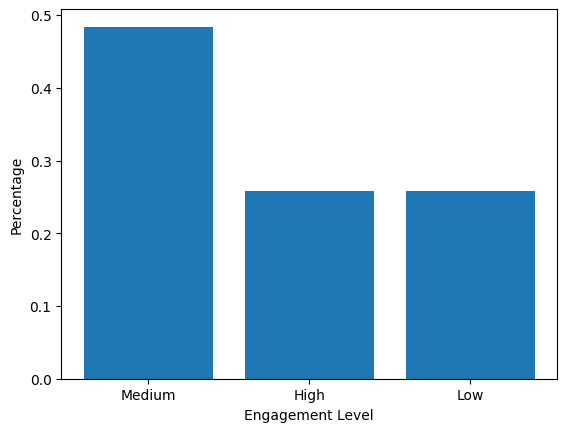

In [7]:

engagement_count = players['engagement'].value_counts()
engagement_lvls = engagement_count.index.tolist()

fig, ax = plt.subplots(1)

ax.bar(engagement_lvls, engagement_count/ engagement_count.sum())
ax.set_ylabel('Percentage')
ax.set_xlabel('Engagement Level') 



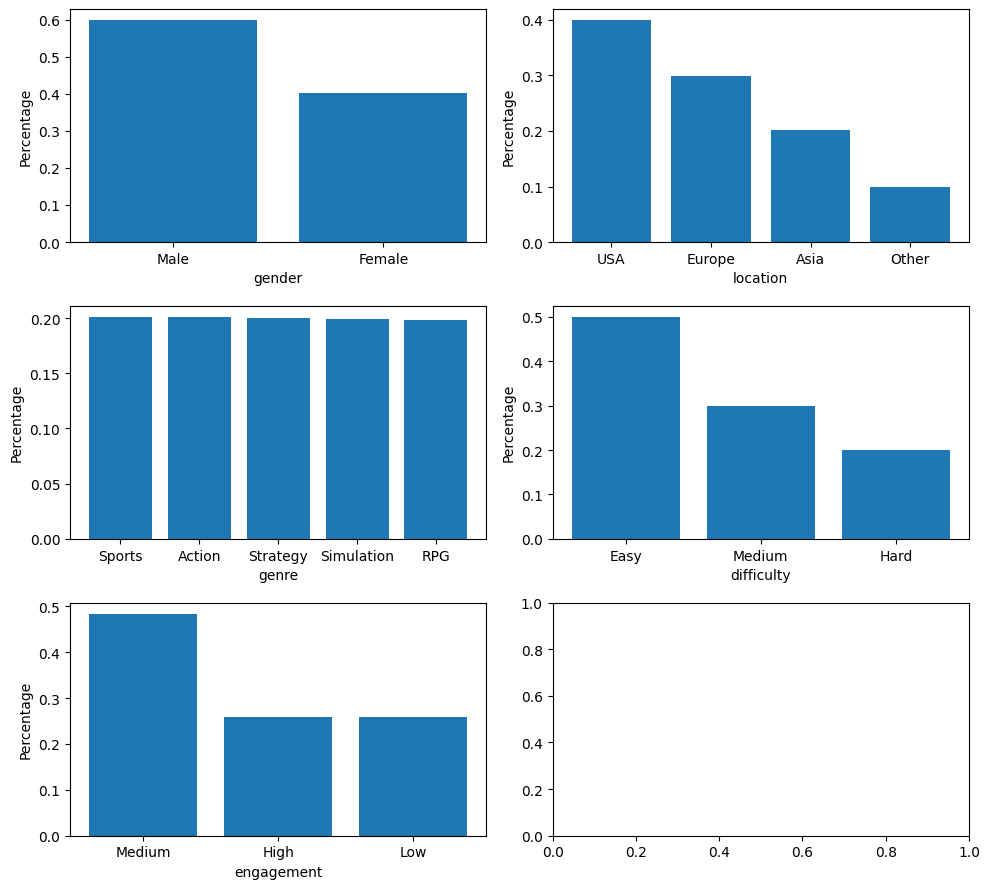

In [8]:
# Plotting all categorical data

fig, ax = plt.subplots( len(catagory_columns) // 2 + len(catagory_columns) % 2, 2, figsize = (10,9) )

ax = ax.flatten()

for i, column_name in enumerate(catagory_columns):
    counts = players[column_name].value_counts()
    cat_types = counts.index.tolist() 
    ax[i].bar(cat_types, counts/ counts.sum()) # could have done proportions with normalised = True
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Percentage')
plt.tight_layout()
plt.show()


In [9]:
num_columns

['age',
 'play_time',
 'purchases',
 'week_sessions',
 'avg_play_duration',
 'p_level',
 'achievemnets']

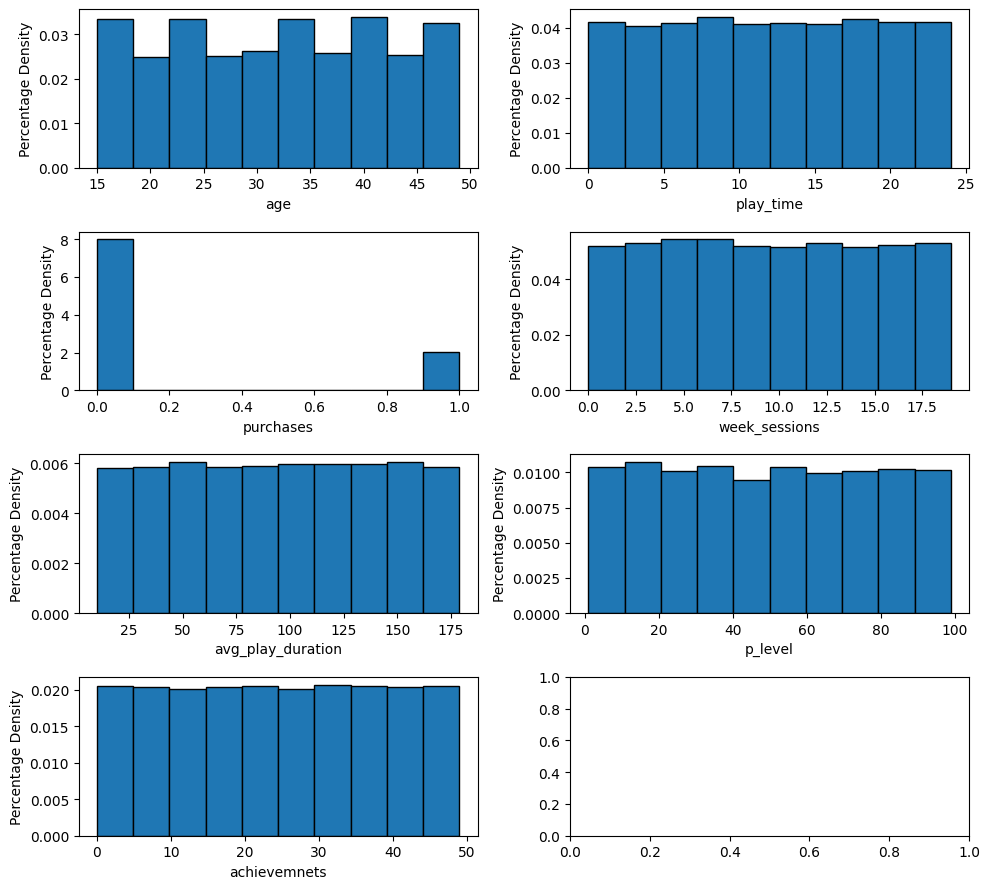

In [15]:
# Plotting numerical data

# Starting with example

# fig, ax = plt.subplots(1)
# num_columns[1]
# ax.hist(players[num_columns[1]], edgecolor = 'black')

fig, ax = plt.subplots( len(num_columns) // 2 + len(num_columns) % 2, 2, figsize = (10,9) )

ax = ax.flatten()



for i, column_name in enumerate(num_columns):
    ax[i].hist(players[column_name], edgecolor = 'black', density = True) # density= True means tha the histograms are probability distributions
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Percentage Density')

plt.tight_layout()
plt.show()



In [11]:
players.head()

,age,gender,location,genre,play_time,purchases,difficulty,week_sessions,avg_play_duration,p_level,achievemnets,engagement
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [12]:
# age demographic of players
print('Maximum age of players is {}'.format(players['Age'].max()))
print('Min agimume of players is {}'.format(players['Age'].min()))

AgeSpan = players['Age'].max() - players['Age'].min()

Ages = players[['PlayerID', 'Age']].groupby('Age').size()

plt.figure(figsize=(10,6))
sns.set(style = "whitegrid", rc = {"lines.linewidth":3})
ax = sns.barplot(Ages)
# sns.histplot(players['Age'], stat = 'percent', bins= 27)


KeyError: 'Age'

The frequency of players at different ages is essentially equivalent here, which is rather unrealistic for video games as they tend to skew younger. 

**Level Ranges**

In [ ]:
# levels span from 1 to 99 
bins = np.arange(0,100,10)

#np digitize maps PlayerLevel to index for which of the bins they belong to
players['LevelBand'] = np.digitize(players['PlayerLevel'], bins)

# Mapping index to corresponding level band
mapping_for_levels = {1: '0-9', 2:'10-19', 3:'20-29', 4: '30-39', 5:'40-49', 6 :'50-59', 7:'60-69',8 :'70-79', 9:'80-89', 10:'90-99' }

players['LevelBand'] = players['LevelBand'].map(mapping_for_levels)


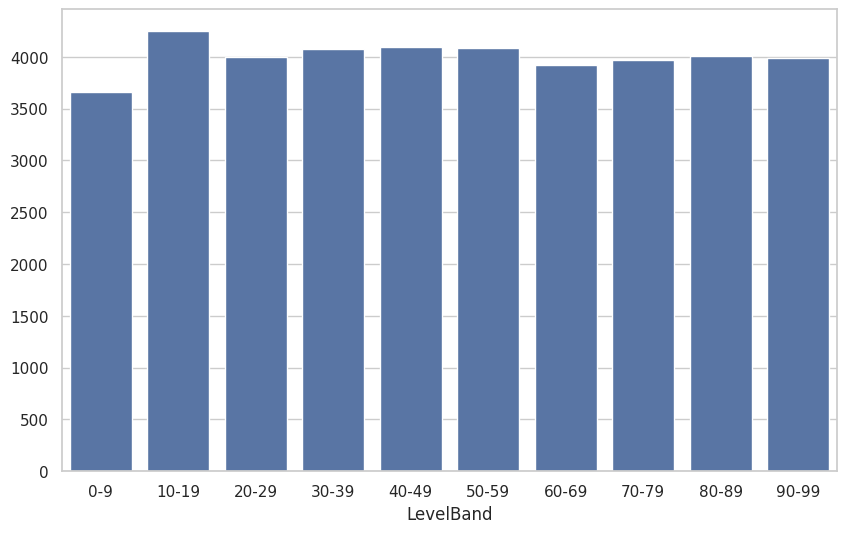

In [ ]:
# plotting level distribution

plt.figure(figsize=(10,6))

PlayerLevelBands =  players[['PlayerID', 'LevelBand']].groupby('LevelBand').size()

PlayerLevelBands.head(10)

ax = sns.barplot(PlayerLevelBands)
plt.show() 

Again, very little variance between number of players in each level band. This is also not so realisic as one would expect most players to have low levels since they are presumably easier to achieve. 

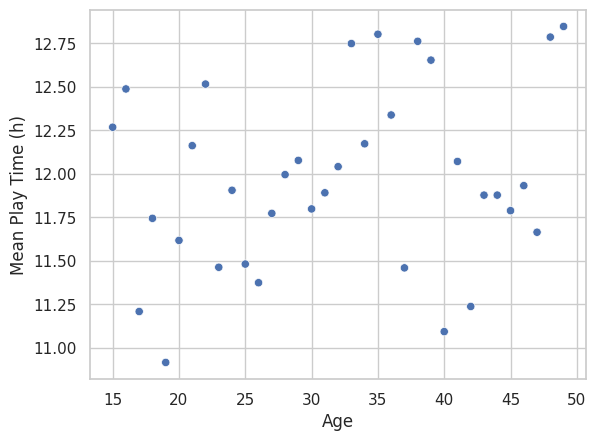

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,LevelBand
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,70-79
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,10-19
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,30-39
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,50-59
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,90-99


In [ ]:
# trying to plot something random now like average_time played against age

sports_data = players[players['GameGenre'] == 'Sports']

# print(sports_data)

# print('data set size: {}'.format(sports_data.to_numpy().size())) 



mean_playtime_for_age = sports_data[['Age', 'PlayTimeHours']].groupby('Age').mean()

plt.Figure(figsize=(10,4))

ax = sns.scatterplot(mean_playtime_for_age, legend=False )
ax.xaxis
ax.set_ylabel('Mean Play Time (h)')
plt.show()
# No obvious trend


players.head()


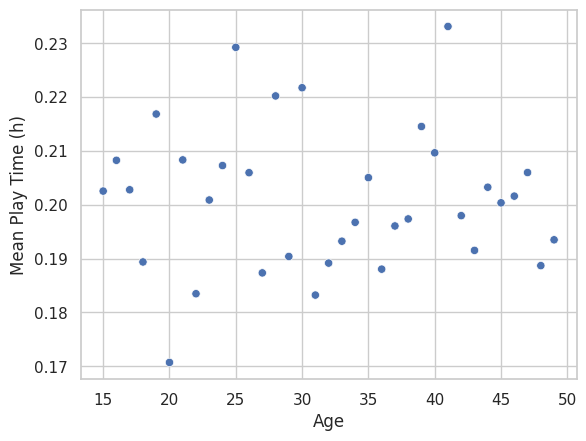

In [ ]:


mean_playtime_for_age = players[['Age', 'InGamePurchases']].groupby('Age').mean()

plt.Figure(figsize=(10,4))

ax = sns.scatterplot(mean_playtime_for_age, legend=False )
ax.xaxis
ax.set_ylabel('Mean Play Time (h)')
plt.show()
# No obvious trend

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel', 'LevelBand'],
      dtype='str')
Narrowing to Gender == Male
Narrowing to GameGenre == Action


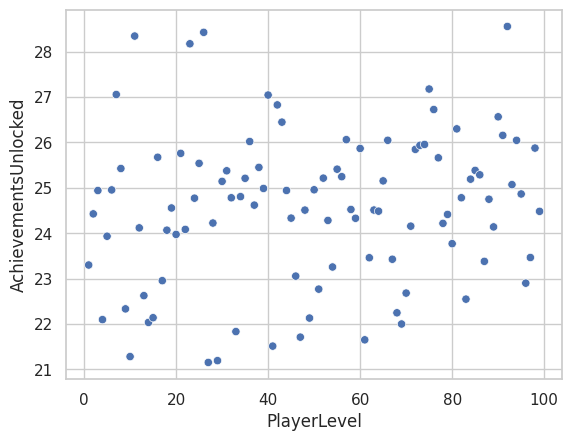

In [ ]:
# Okay there's so many options that I think that I should write a function that can do the plotting for me

def DataPlot(ReleventData = players, x_field = 'PLayerID', y_field = 'Age', conditions = np.empty((2,0))):
    '''
    Args:
        ReleventData (pandas DataFrame) : Origional dataset
        x_field (str) : Name of field which contains desired x-axes data
        y_field (str) : Name of field which contains desired y-axes data
        conditions (array (2,)) : [Name of field for condition, Name of desired value]

    '''
    if np.array(conditions).size != 0:
        for condition in conditions:
            condition_field, condition_value = condition[0], condition[1]
            print('Narrowing to {} == {}'.format(condition_field, condition_value))
            ReleventData = players[players[condition_field] == condition_value]

    if ReleventData.to_numpy().size == 0:
        print('No data left after conditions')
        return 0
    else:
        MeanData = ReleventData[[x_field, y_field]].groupby(x_field).mean()

        plt.Figure(figsize=(10,4))

        ax = sns.scatterplot(MeanData, legend=False )
        ax.xaxis
        ax.set_ylabel(y_field)
        ax.set_xlabel(x_field)

        plt.show()
        # No obvious trend

players.head()

columns = players.columns

print(columns)

conditions=['Gender', 'Male']



DataPlot(players, 'PlayerLevel', 'AchievementsUnlocked', conditions= [['Gender', 'Male'], ['GameGenre','Action']])


In [ ]:
players.head(20)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,LevelBand
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,70-79
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,10-19
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,30-39
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,50-59
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,90-99
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low,70-79
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low,10-19
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium,20-29
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium,20-29
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High,90-99


In [ ]:
# let's see if it works

engagement_count = players['EngagementLevel'].value_counts()

engage_lvls = engagement_count.index.tolist()
print(engage_lvls)

['Medium', 'High', 'Low']
